# Fuzzy Controller

In [1]:
import numpy as np
import matplotlib.pyplot as plt
class IT2_GFHS:
    def __init__(self, insize, out_size):
        self.sigma_lower = np.ones([insize])#sigma_lower
        self.sigma_upper = np.ones([insize])*1.2#sigma_upper
        self.W_IT2_GFHS = np.ones([out_size, insize*2+1])
        self.d = np.ones([insize])
        self.K_upper = np.random.random([insize])
        self.K_lower = np.random.random([insize])
    def forward(self, u_GFHM):
        sai = np.hstack([np.array([1]),np.tanh(np.diag(self.K_lower) @ (u_GFHM - self.d) / self.sigma_lower **2),np.tanh(np.diag(self.K_upper) @ (u_GFHM - self.d) / self.sigma_upper**2)])#
        Y_IT2_GFHS = self.W_IT2_GFHS @ sai
        # self.Update(Y_IT2_GFHS, u_GFHM, Y_des, sai, eta)
        return Y_IT2_GFHS
    def Update(self, u_GFHM, y, eta = .1):
        Y_IT2_GFHS = self.forward(u_GFHM)
        sai = np.hstack([np.array([1]),np.tanh(np.diag(self.K_lower) @ (u_GFHM - self.d) / self.sigma_lower **2),np.tanh(np.diag(self.K_upper) @ (u_GFHM - self.d) / self.sigma_upper**2)])
        e_IT2_GFHS = y - Y_IT2_GFHS
        temp = np.hstack([(-np.diag(self.K_lower)) / self.sigma_lower **2*(1-np.tanh(np.diag(self.K_lower) @ (u_GFHM - self.d) / self.sigma_lower **2)**2),(-np.diag(self.K_upper)) / self.sigma_upper*(1-np.tanh(np.diag(self.K_upper) @ (u_GFHM - self.d) / self.sigma_upper**2)**2)])
        self.d += eta * np.expand_dims(e_IT2_GFHS,1).sum() * self.W_IT2_GFHS.sum() * temp.sum(-1)

        temp = (-np.diag(self.K_lower) @ (u_GFHM - self.d) / self.sigma_lower **3)*(1-np.tanh(np.diag(self.K_lower) @ (u_GFHM - self.d) / self.sigma_lower **2)**2)
        self.sigma_lower += eta * e_IT2_GFHS.sum() * self.W_IT2_GFHS.sum() * temp#.sum(-1)
        temp = (-np.diag(self.K_upper) @ (u_GFHM - self.d) / self.sigma_upper**3)*(1-np.tanh(np.diag(self.K_upper) @ (u_GFHM - self.d) / self.sigma_upper**2)**2)
        self.sigma_upper += eta * e_IT2_GFHS.sum() * self.W_IT2_GFHS.sum() * temp#.sum(-1)

        temp = (u_GFHM - self.d) / (self.sigma_lower**2)*(1-np.tanh(np.diag(self.K_lower) @ (u_GFHM - self.d) / self.sigma_lower**2)**2)
        self.K_lower += eta * e_IT2_GFHS.sum() * self.W_IT2_GFHS.sum() * temp
        temp = (u_GFHM - self.d) / self.sigma_upper**2*(1-np.tanh(np.diag(self.K_upper) @ (u_GFHM - self.d) / self.sigma_upper**2)**2)
        self.K_upper += eta * e_IT2_GFHS.sum() * self.W_IT2_GFHS.sum() * temp
        self.W_IT2_GFHS += eta * np.expand_dims(e_IT2_GFHS,1) * np.expand_dims(sai,0)
        

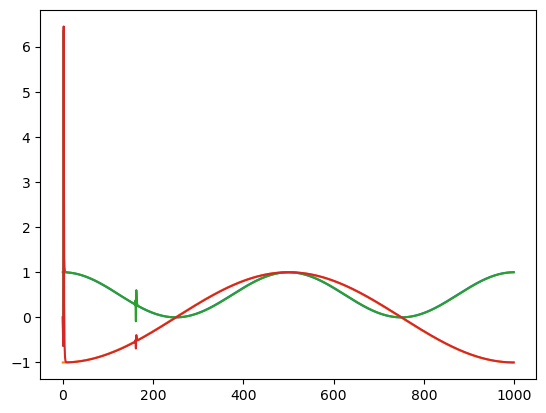

In [2]:
t = np.linspace(0,np.pi*2,1000)
x = np.array([np.sin(.5*t),np.cos(-2*t),np.sin(-.7*t+np.pi/4)**2]).T
y = np.array([np.cos(t)**2, np.sin(t-np.pi/2)]).T

model = IT2_GFHS(3, 2)
y_pred = np.zeros(y.shape)
for i in range(x.shape[0]-1):
    y_pred[i+1] = model.forward(x[i+1])
    model.Update(x[i+1], y[i+1])
plt.plot(y)
plt.plot(y_pred)

In [3]:
model = IT2_GFHS(5, 2)
# Sample Time
z = np.arange(0, 200.1, 0.1)

# Input Signal
u = np.sin(2 * np.pi * z / 100)

# Initial Condition
Y = np.zeros([len(z) + 1,2])
s = u.shape
Y_IT2_GFHS = []
for i in range(s[0]):
    # Actual System
    Y[i + 1,0] = Y[i,0] / (1 + Y[i,0] ** 2) + u[i] ** 3
    Y[i + 1,1] = Y[i,1] / (1 + Y[i,1]) + u[i] ** 2
    u_GFHM = np.array([Y[i + 1,0],Y[i + 1,1], Y[i,0], Y[i,1], u[i]])
    Y_IT2_GFHS.append(model.forward(u_GFHM))
    model.Update(u_GFHM, Y[i+1])
Y_IT2_GFHS = np.array(Y_IT2_GFHS)

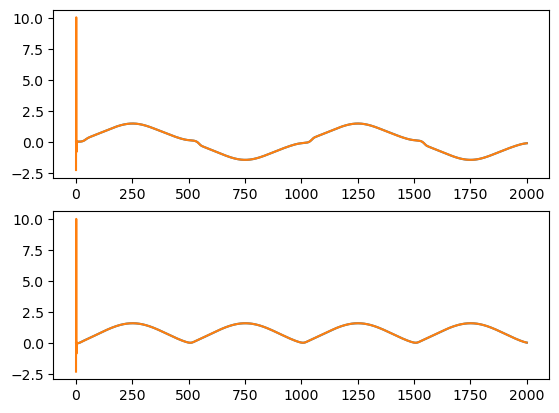

In [4]:
plt.subplot(2,1,1)
plt.plot(Y[:,0])
plt.plot(Y_IT2_GFHS[:,0])
plt.subplot(2,1,2)
plt.plot(Y[:,1])
plt.plot(Y_IT2_GFHS[:,1])